In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("datasets/hamamatsu_temp.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

In [3]:
df

,temp
date,
2000-01-01,9.0
2000-01-02,9.1
2000-01-03,10.2
2000-01-04,9.7
2000-01-05,9.1
...,...
2022-10-22,19.9
2022-10-23,20.1
2022-10-24,17.7


In [4]:
df_month = df["2000":"2022"].resample("M").mean()

In [5]:
train = df_month["2000":"2020"]
test = df_month["2020":]

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
model_arima = ARIMA(train, order=(12, 1, 12))

In [31]:
result_arima = model_arima.fit()

/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
print(result_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  252
Model:               ARIMA(12, 1, 12)   Log Likelihood                -369.919
Date:                Fri, 28 Oct 2022   AIC                            789.838
Time:                        00:48:20   BIC                            877.974
Sample:                    01-31-2000   HQIC                           825.306
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3869      0.358     -1.081      0.280      -1.089       0.315
ar.L2         -0.4802      0.276     -1.740      0.082      -1.021       0.061
ar.L3         -0.5236      0.352     -1.488      0.1

In [34]:
prediction_arima = result_arima.predict(start=len(train), end=len(df_month))

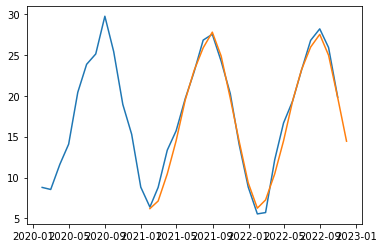

In [35]:
plt.plot(test)
plt.plot(prediction_arima)
plt.show()

<p>
    ↑うまくできていない... パラメータを調整しよう<br>
    ARIMAパラメータ設定には赤池情報量基準(AIC)を用いる<br>
    AICは総当たりで最適なパラメータを設定する。
</p>

In [36]:
# モデルの優劣の判定にAICという基準を使う
min_aic = 99999999

# 最もAICがよかった（小さかった）p,d,qを格納する
min_pdq = []

for p in range(4, 7):
    for d in range(0, 3):
        for q in range(1, 3):
            model_arima = ARIMA(train, order=[p, d, q])
            try:
                result_arima = model_arima.fit()
            except:
                print(p, d, q, "では収束しませんでした")
                continue
            result_arima_aic = result_arima.aic
            print(p, d, q, result_arima_aic)
            if result_arima_aic < min_aic:
                min_aic = result_arima_aic
                min_pdq = [p, d, q]

4 0 1 896.0668440610139


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 0 2 816.4796817349202
4 1 1 941.2139665893552


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 1 2 884.8637485104015
4 2 1 1099.4054225154036


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 2 2 948.2333024638111
5 0 1 893.277703242682


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 0 2 897.7228829931837
5 1 1 919.180126855633
5 1 2 943.6868113070041


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


5 2 1 1060.2924362993463


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 2 2 927.5594545454303
6 0 1 887.511061605384


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6 0 2 892.5098276644151
6 1 1 897.4309049929534


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6 1 2 913.198640852869


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6 2 1 1029.8371783176053
6 2 2 909.015376731801


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
min_pdq

[4, 0, 2]

In [41]:
model_arima = ARIMA(train, order=(4, 0, 2))
result_arima = model_arima.fit()
print(result_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  252
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -400.240
Date:                Fri, 28 Oct 2022   AIC                            816.480
Time:                        00:55:31   BIC                            844.715
Sample:                    01-31-2000   HQIC                           827.841
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6780      0.094    177.779      0.000      16.494      16.862
ar.L1          2.1578      0.073     29.748      0.000       2.016       2.300
ar.L2         -1.9119      0.160    -11.924      0.0

/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
prediction_arima = result_arima.predict(start=len(train), end=len(df_month))

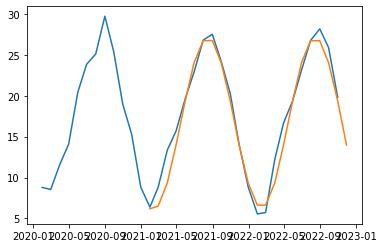

In [40]:
plt.plot(test)
plt.plot(prediction_arima)
plt.show()